In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import(PowerNorm,LogNorm)
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import os
import scipy.ndimage as snd
from scipy import signal

In [2]:
image = fits.getdata('./Data/2018-05-17/M51/100sB.00000080.M 51.fit')

In [4]:
stats = sigma_clipped_stats(image,sigma=3,iters=3)
median = stats[1]
sigma = stats[2]
print median
print sigma

1581.0
25.3901995825


In [5]:
filt = signal.medfilt(image,7)

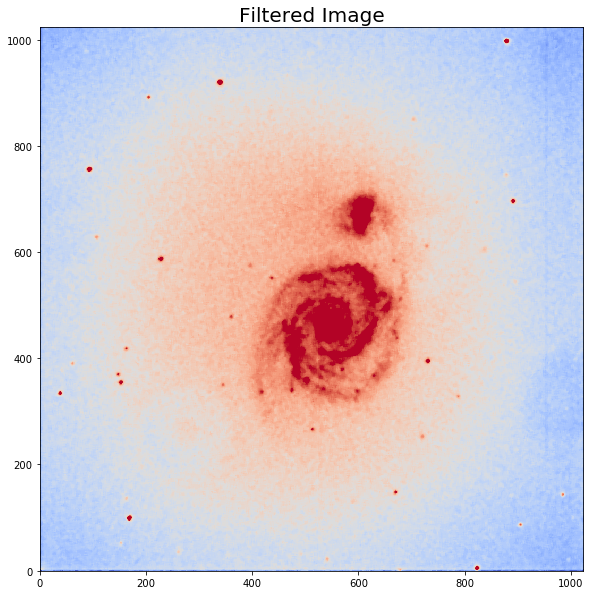

In [9]:
plt.figure(figsize=((10,10)))
plt.imshow(filt,vmin=median-3*sigma,vmax=median+3*sigma,cmap=plt.cm.coolwarm, origin='lower')
plt.title('Filtered Image', fontsize=20)
plt.show()

In [10]:
mask = np.zeros_like(image)

x_range = np.concatenate((np.arange(0,300),np.arange(724,1024)))
y_range = np.concatenate((np.arange(0,200),np.arange(824,1024)))


for i in x_range:
    for j in range(1024):
        if filt[i][j] > median+3*sigma:
            mask[i][j] = 1
for j in y_range:
    for i in range(1024):
        if filt[i][j] > median+3*sigma:
            mask[i][j] = 1

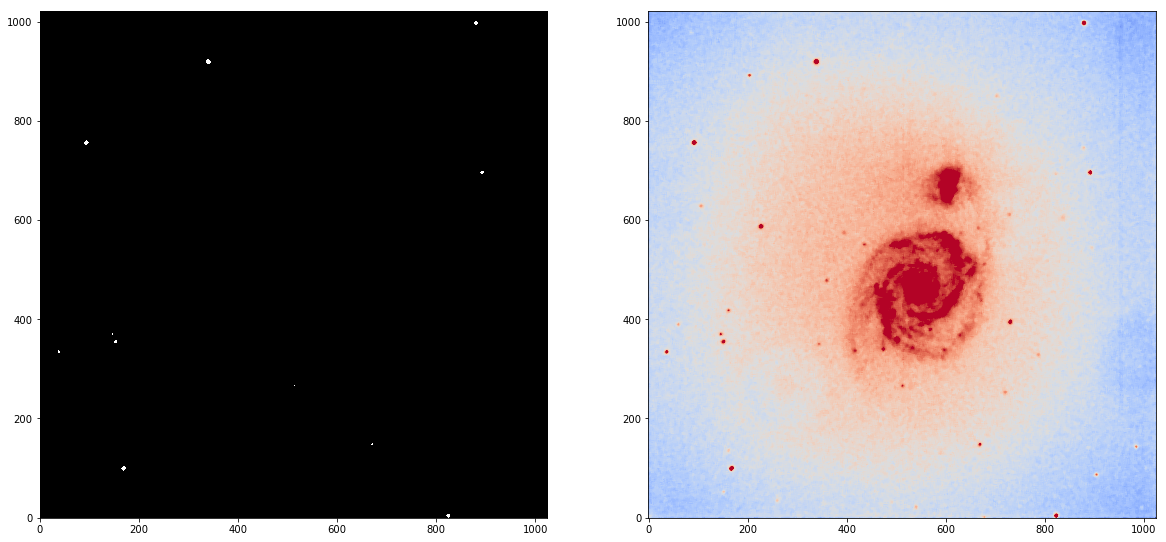

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(mask,origin='lower', cmap='gray')
plt.subplot(122)
plt.imshow(filt,vmin=median-3*sigma,vmax=median+3*sigma,cmap=plt.cm.coolwarm, origin='lower')
plt.show()

In [14]:
labels,num = snd.label(mask == 1, np.ones((3,3)))
centers = snd.center_of_mass(mask,labels,range(1,num+1))

In [16]:
x = np.array(centers)[:,0]
y = np.array(centers)[:,1]

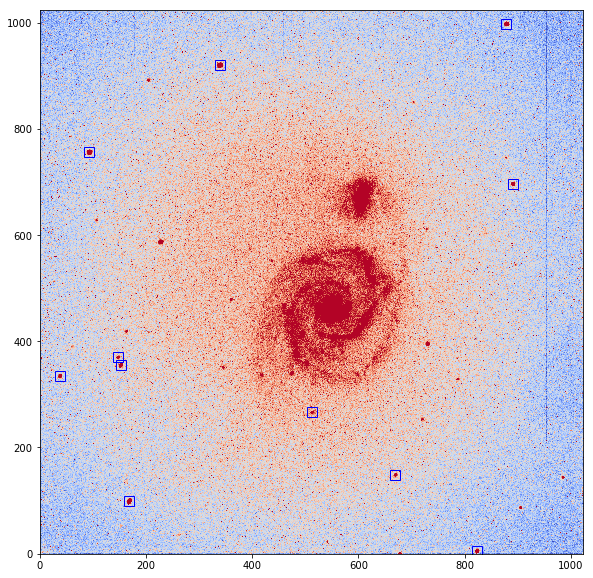

In [20]:
fig = plt.figure(figsize=((10,10)))
plt.plot(y,x,'bs', markersize=10, mfc='none')
plt.imshow(image,vmin=median-3*sigma,vmax=median+3*sigma,cmap=plt.cm.coolwarm, origin='lower')
plt.show()
#fig.savefig('./Star_loc.pdf', bbox_inches='tight')